In [1]:
import numpy as np
import math
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
import cartopy
import cartopy.crs as ccrs
import metpy.calc as mpcalc
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import pop_tools 
import matplotlib.path as mpath
import dask
import esmlab
import utils
import pandas as pd

import matplotlib.gridspec as gridspec
import matplotlib.colors as colors

### get daily data and immediately convert it to monthly

In [4]:
year = '1964'
path = '/glade/scratch/mlevy/feisty_output/full_companion_run.002/hist/companion.' + year + '.zarr'

In [5]:
ds = xr.open_zarr(path, consolidated=False)

In [6]:
ds

<xarray.Dataset>
Dimensions:  (group: 9, nlat: 384, nlon: 320, time: 365)
Coordinates:
  * group    (group) object 'Sf' 'Sp' 'Sd' 'Mf' ... 'Lp' 'Ld' 'benthic_prey'
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 8 ... 376 377 378 379 380 381 382 383
  * nlon     (nlon) int64 0 1 2 3 4 5 6 7 8 ... 312 313 314 315 316 317 318 319
  * time     (time) object 1964-01-01 00:00:00 ... 1964-12-31 00:00:00
Data variables:
    biomass  (time, group, nlat, nlon) float64 dask.array<chunksize=(365, 9, 128, 80), meta=np.ndarray>

In [7]:
ds_mon = ds.resample({'time':'M'}).mean(dim='time').compute()

In [8]:
ds_mon.biomass

<xarray.DataArray 'biomass' (time: 12, group: 9, nlat: 384, nlon: 320)>
array([[[[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [4.84117679e-05, 4.88232659e-05, 4.93245238e-05, ...,
                     nan,            nan,            nan],
         ...,
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan]],

        [[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [8.67912411e-06, 8.67621680e-06, 8.67266658e-06, ...,
                     nan,            nan,            nan],
...
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan]],

        [[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [1.58746578e+01, 1.65038387e+01, 1.78002433e+01, ...,
                     nan,            nan,            nan],
         ...,
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan]]]])
Coordinates:
  * time     (time) object 1964-01-31 00:00:00 ... 1964-12-31 00:00:00
  * group    (group) object 'Sf' 'Sp' 'Sd' 'Mf' ... 'Lp' 'Ld' 'benthic_prey'
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 8 ... 376 377 378 379 380 381 382 383
  * nlon     (nlon) int64 0 1 2 3 4 5 6 7 8 ... 312 313 314 315 316 317 318 319

In [9]:
# file = '/glade/scratch/mlevy/feisty_output/full_companion_run.001/hist/companion.monthly.1958-2021.nc'
# ds = xr.open_dataset(file)

In [10]:
ds.biomass

<xarray.DataArray 'biomass' (time: 365, group: 9, nlat: 384, nlon: 320)>
dask.array<xarray-biomass, shape=(365, 9, 384, 320), dtype=float64, chunksize=(365, 9, 128, 80), chunktype=numpy.ndarray>
Coordinates:
  * group    (group) object 'Sf' 'Sp' 'Sd' 'Mf' ... 'Lp' 'Ld' 'benthic_prey'
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 8 ... 376 377 378 379 380 381 382 383
  * nlon     (nlon) int64 0 1 2 3 4 5 6 7 8 ... 312 313 314 315 316 317 318 319
  * time     (time) object 1964-01-01 00:00:00 ... 1964-12-31 00:00:00

In [12]:
### first do 1958
year=1958

yr4="{:04d}".format(year)
path = '/glade/scratch/mlevy/feisty_output/full_companion_run.002/hist/companion.' + yr4 + '.zarr'

ds_tmp = xr.open_zarr(path, consolidated=False)

ds = ds_tmp.resample({'time':'M'}).mean(dim='time').compute()

### then do the rest of the years

for year in np.arange(1959,2022,1):
    print(year)
    yr4="{:04d}".format(year)
    path = '/glade/scratch/mlevy/feisty_output/full_companion_run.002/hist/companion.' + yr4 + '.zarr'
    
    ds_tmp = xr.open_zarr(path, consolidated=False)
    
    ds_mon = ds_tmp.resample({'time':'M'}).mean(dim='time').compute()
    
    ds = xr.concat([ds, ds_mon], "time")

1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [13]:
#/glade/scratch/mlevy/feisty_output/hist/companion.monthly.1958-2021.nc

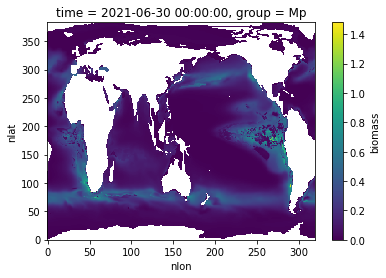

In [14]:
ds.biomass.sel(group='Mp').isel(time=761).plot()

### spin up some dask to make the processing faster

In [15]:
def get_ClusterClient():
    import dask
    from dask_jobqueue import PBSCluster
    from dask.distributed import Client
    cluster = PBSCluster(
        cores=1,
        memory='25GB',
        processes=1,
        queue='casper',
        resource_spec='select=1:ncpus=1:mem=25GB',
        project='NCGD0011',
        walltime='02:00:00',
        interface='ib0',)

    dask.config.set({
        'distributed.dashboard.link':
        'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status'
    })
    client = Client(cluster)
    return cluster, client

In [16]:
cluster, client = get_ClusterClient()
cluster.scale(8) 

In [17]:
client

Client Scheduler: tcp://10.12.206.61:33220 Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/kristenk/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [18]:
### annual mean

ds_ann = ds.resample({'time':'A'}).mean(dim='time').compute()

In [19]:
ds_grid = pop_tools.get_grid('POP_gx1v7')
lons = ds_grid.TLONG
lats = ds_grid.TLAT
area = ds_grid.TAREA

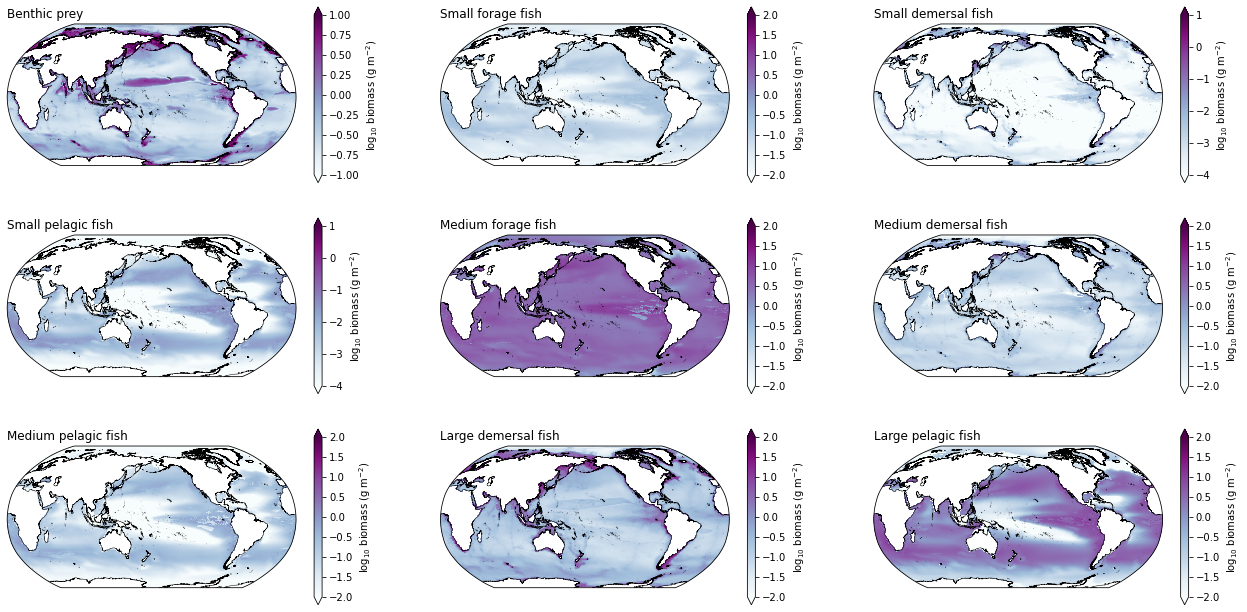

In [23]:
fig = plt.figure(figsize=(22,11))


########################################################################### Benthic prey
ax = fig.add_subplot(3,3,1, projection=ccrs.Robinson(central_longitude=180))

ax.set_title('Benthic prey', loc='left')
group ='benthic_prey'
lon, lat, field = utils.adjust_pop_grid(lons, lats, np.log10(ds_ann.biomass.sel(group=group).isel(time=63))) 
ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(lon, lat, field, 
                 vmin=-1, vmax=1, 
                 cmap='BuPu',
                 transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, extend='both',label='log$_{10}$ biomass (g m$^{-2}$)')

########################################################################### small forage
ax = fig.add_subplot(3,3,2, projection=ccrs.Robinson(central_longitude=180))

ax.set_title('Small forage fish', loc='left')
group='Sf'
lon, lat, field = utils.adjust_pop_grid(lons, lats, np.log10(ds_ann.biomass.sel(group=group).isel(time=63))) 

ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(lon, lat, field, 
                 vmin=-2,vmax=2,
                 cmap='BuPu',
                 transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, extend='both',label='log$_{10}$ biomass (g m$^{-2}$)')

########################################################################### small demersal
ax = fig.add_subplot(3,3,3, projection=ccrs.Robinson(central_longitude=180))

ax.set_title('Small demersal fish', loc='left')
group ='Sd'
lon, lat, field = utils.adjust_pop_grid(lons, lats, np.log10(ds_ann.biomass.sel(group=group).isel(time=63))) 
ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(lon, lat, field, 
                 vmin=-4,vmax=1,
                 cmap='BuPu',
                 transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, extend='both',label='log$_{10}$ biomass (g m$^{-2}$)')


########################################################################### small pelagic
ax = fig.add_subplot(3,3,4, projection=ccrs.Robinson(central_longitude=180))

ax.set_title('Small pelagic fish', loc='left')
group = 'Sp'
lon, lat, field = utils.adjust_pop_grid(lons, lats, np.log10(ds_ann.biomass.sel(group=group).isel(time=63))) 
ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(lon, lat, field, 
                 vmin=-4,vmax=1,
                 cmap='BuPu',
                 transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, extend='both',label='log$_{10}$ biomass (g m$^{-2}$)')


########################################################################### medium forage
ax = fig.add_subplot(3,3,5, projection=ccrs.Robinson(central_longitude=180))

ax.set_title('Medium forage fish', loc='left')
group = 'Mf'
lon, lat, field = utils.adjust_pop_grid(lons, lats, np.log10(ds_ann.biomass.sel(group=group).isel(time=63))) 
ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(lon, lat, field, 
                 vmin=-2,vmax=2,
                 cmap='BuPu',
                 transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, extend='both',label='log$_{10}$ biomass (g m$^{-2}$)')


########################################################################### med demersal
ax = fig.add_subplot(3,3,6, projection=ccrs.Robinson(central_longitude=180))

ax.set_title('Medium demersal fish', loc='left')
group ='Md'
lon, lat, field = utils.adjust_pop_grid(lons, lats, np.log10(ds_ann.biomass.sel(group=group).isel(time=63)))

ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(lon, lat, field, 
                 vmin=-2,vmax=2,
                 cmap='BuPu',
                 transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, extend='both',label='log$_{10}$ biomass (g m$^{-2}$)')


########################################################################### med pelagic
ax = fig.add_subplot(3,3,7, projection=ccrs.Robinson(central_longitude=180))

ax.set_title('Medium pelagic fish', loc='left')
group = 'Mp'
lon, lat, field = utils.adjust_pop_grid(lons, lats, np.log10(ds_ann.biomass.sel(group=group).isel(time=63)))

ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(lon, lat, field, 
                 vmin=-2,vmax=2,
                 cmap='BuPu',
                 transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, extend='both',label='log$_{10}$ biomass (g m$^{-2}$)')

########################################################################### large demersal
ax = fig.add_subplot(3,3,8, projection=ccrs.Robinson(central_longitude=180))

ax.set_title('Large demersal fish', loc='left')
group = 'Ld'
lon, lat, field = utils.adjust_pop_grid(lons, lats, np.log10(ds_ann.biomass.sel(group=group).isel(time=63)))

ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(lon, lat, field, 
                 vmin=-2,vmax=2,
                 cmap='BuPu',
                 transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, extend='both',label='log$_{10}$ biomass (g m$^{-2}$)')

########################################################################### large pelagic
ax = fig.add_subplot(3,3,9, projection=ccrs.Robinson(central_longitude=180))

ax.set_title('Large pelagic fish', loc='left')
group ='Lp'
lon, lat, field = utils.adjust_pop_grid(lons, lats, np.log10(ds_ann.biomass.sel(group=group).isel(time=63)))

ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(lon, lat, field, 
                 vmin=-2,vmax=2,
                 cmap='BuPu',
                 transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, extend='both',label='log$_{10}$ biomass (g m$^{-2}$)')

### Sum up forage fish, pelagics, and demersals, and all fish

In [26]:
tot_forage = ds_ann.biomass.sel(group='Sf').isel(time=63) + ds_ann.biomass.sel(group='Mf').isel(time=63)

tot_pelagic = ds_ann.biomass.sel(group='Sp').isel(time=63) + ds_ann.biomass.sel(group='Mp').isel(time=63) + ds_ann.biomass.sel(group='Lp').isel(time=63)
                                                                                                 
                                                                                                 

tot_demersal = ds_ann.biomass.sel(group='Sd').isel(time=63) + ds_ann.biomass.sel(group='Md').isel(time=63) + ds_ann.biomass.sel(group='Ld').isel(time=63)

tot_fish = tot_forage + tot_pelagic + tot_demersal

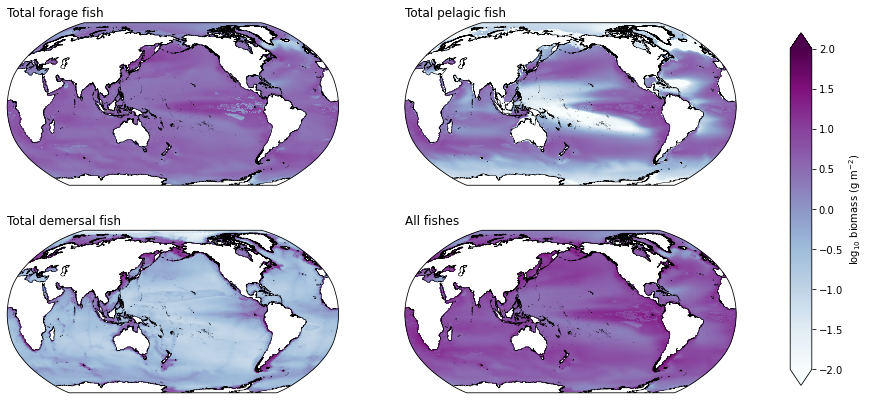

In [27]:
fig = plt.figure(figsize=(15,7))


########################################################################### 
ax = fig.add_subplot(2,2,1, projection=ccrs.Robinson(central_longitude=180))

ax.set_title('Total forage fish', loc='left')
lon, lat, field = utils.adjust_pop_grid(lons, lats, np.log10(tot_forage)) 
ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(lon, lat, field, 
                 vmin=-2, vmax=2, 
                 cmap='BuPu',
                 transform=ccrs.PlateCarree())

########################################################################### 
ax = fig.add_subplot(2,2,2, projection=ccrs.Robinson(central_longitude=180))

ax.set_title('Total pelagic fish', loc='left')
lon, lat, field = utils.adjust_pop_grid(lons, lats, np.log10(tot_pelagic)) 
ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(lon, lat, field, 
                 vmin=-2, vmax=2, 
                 cmap='BuPu',
                 transform=ccrs.PlateCarree())
########################################################################### 
ax = fig.add_subplot(2,2,3, projection=ccrs.Robinson(central_longitude=180))

ax.set_title('Total demersal fish', loc='left')
lon, lat, field = utils.adjust_pop_grid(lons, lats, np.log10(tot_demersal)) 
ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(lon, lat, field, 
                 vmin=-2, vmax=2, 
                 cmap='BuPu',
                 transform=ccrs.PlateCarree())
########################################################################### 
ax = fig.add_subplot(2,2,4, projection=ccrs.Robinson(central_longitude=180))

ax.set_title('All fishes', loc='left')
lon, lat, field = utils.adjust_pop_grid(lons, lats, np.log10(tot_fish)) 
ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(lon, lat, field, 
                 vmin=-2, vmax=2, 
                 cmap='BuPu',
                 transform=ccrs.PlateCarree())

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar1 = fig.colorbar(pc, cax=cbar_ax,extend='both',label='log$_{10}$ biomass (g m$^{-2}$)')

### Rgional averages

In [29]:
###box 1, North Pacific
box1_latmin = 35
box1_latmax = 50
box1_lonmin = -170.
box1_lonmax = -140.


###box 2, subtropical North Pacific
box2_latmin = 15
box2_latmax = 25
box2_lonmin = -170.
box2_lonmax = -140.

###box 3, subantarcic  Pacific sector
box3_latmin = -55
box3_latmax = -45
box3_lonmin = -170.
box3_lonmax = -140.

###box 4, North Atlantic
box4_latmin = 40
box4_latmax = 50
box4_lonmin = -45.
box4_lonmax = -10.

###box 5, Eastern equatorial pacific
box5_latmin = -5
box5_latmax = 5
box5_lonmin = -105.
box5_lonmax = -80.

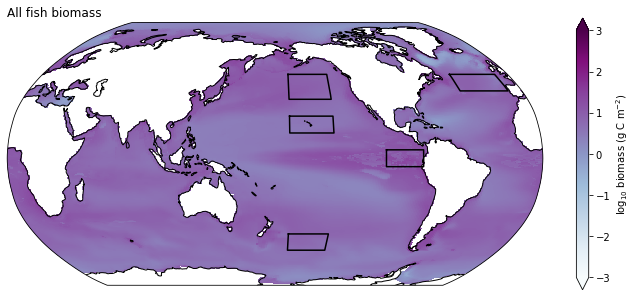

In [30]:
group = 'Mp'

fig = plt.figure(figsize=(12,5))

##################################################################### modis chlorophyll
ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson(central_longitude=180))

ax.set_title('All fish biomass', loc = 'left')
#ax.set_extent([-180, 180, -90, 90], ccrs.Robinson(central_longitude=180))

ax.coastlines('110m',linewidth=1)

lon, lat, field = utils.adjust_pop_grid(lons, lats,  np.log10(tot_fish))

pc=ax.pcolormesh(lon, lat, field, cmap='BuPu',
                 vmin=-3,vmax=3,
                 #norm=colors.LogNorm(vmin=0.001, vmax=1),
                          transform=ccrs.PlateCarree())

lon_pts = [box1_lonmin,box1_lonmax,box1_lonmax,box1_lonmin,box1_lonmin]
lat_pts = [box1_latmax,box1_latmax,box1_latmin,box1_latmin,box1_latmax]
ax.plot(lon_pts, lat_pts, color="black", linewidth=1.5,transform=ccrs.PlateCarree())

lon_pts = [box2_lonmin,box2_lonmax,box2_lonmax,box2_lonmin,box2_lonmin]
lat_pts = [box2_latmax,box2_latmax,box2_latmin,box2_latmin,box2_latmax]
ax.plot(lon_pts, lat_pts, color="black", linewidth=1.5,transform=ccrs.PlateCarree())

lon_pts = [box3_lonmin,box3_lonmax,box3_lonmax,box3_lonmin,box3_lonmin]
lat_pts = [box3_latmax,box3_latmax,box3_latmin,box3_latmin,box3_latmax]
ax.plot(lon_pts, lat_pts, color="black", linewidth=1.5,transform=ccrs.PlateCarree())

lon_pts = [box4_lonmin,box4_lonmax,box4_lonmax,box4_lonmin,box4_lonmin]
lat_pts = [box4_latmax,box4_latmax,box4_latmin,box4_latmin,box4_latmax]
ax.plot(lon_pts, lat_pts, color="black", linewidth=1.5,transform=ccrs.PlateCarree())

lon_pts = [box5_lonmin,box5_lonmax,box5_lonmax,box5_lonmin,box5_lonmin]
lat_pts = [box5_latmax,box5_latmax,box5_latmin,box5_latmin,box5_latmax]
ax.plot(lon_pts, lat_pts, color="black", linewidth=1.5,transform=ccrs.PlateCarree())

fig.colorbar(pc,extend='both', label='log$_{10}$ biomass (g C m$^{-2}$)');

In [31]:
ones = np.full((384,320),1,dtype=int)
ones = xr.DataArray(ones,dims=('nlat','nlon'))
ones = ones.where(ds_grid.REGION_MASK>0)

In [32]:
lons_norm = utils.normal_lons(lons)

In [33]:
variables = ds.group.values

In [34]:
ts_box1 = xr.Dataset()
ts_box2 = xr.Dataset()
ts_box3 = xr.Dataset()
ts_box4 = xr.Dataset()
ts_box5 = xr.Dataset()

for var in variables:
    print(var)
    
    mask = ones.where(lats<box1_latmax).where(lats>box1_latmin).where(lons_norm<box1_lonmax).where(lons_norm>box1_lonmin)
    masked = ds.biomass.sel(group=var).where(mask==1)
    masked_area = area.where(mask==1)
    ## reset nlon and nlat; otherwise there's an error
    mask['nlat'] = ds_grid.nlat
    masked['nlat'] = ds_grid.nlat
    masked_area['nlat'] = ds_grid.nlat
    mask['nlon'] = ds_grid.nlon
    masked['nlon'] = ds_grid.nlon
    masked_area['nlon'] = ds_grid.nlon
    ts_box1[var] = (masked * masked_area).sum(dim=('nlon','nlat')) / masked_area.sum(dim=('nlon','nlat'))
    
    mask = ones.where(lats<box2_latmax).where(lats>box2_latmin).where(lons_norm<box2_lonmax).where(lons_norm>box2_lonmin)
    masked = ds.biomass.sel(group=var).where(mask==1)
    masked_area = area.where(mask==1)
    ## reset nlon and nlat; otherwise there's an error
    mask['nlat'] = ds_grid.nlat
    masked['nlat'] = ds_grid.nlat
    masked_area['nlat'] = ds_grid.nlat
    mask['nlon'] = ds_grid.nlon
    masked['nlon'] = ds_grid.nlon
    masked_area['nlon'] = ds_grid.nlon
    ts_box2[var] = (masked * masked_area).sum(dim=('nlon','nlat')) / masked_area.sum(dim=('nlon','nlat'))
    
    mask = ones.where(lats<box3_latmax).where(lats>box3_latmin).where(lons_norm<box3_lonmax).where(lons_norm>box3_lonmin)
    masked = ds.biomass.sel(group=var).where(mask==1)
    masked_area = area.where(mask==1)
    ## reset nlon and nlat; otherwise there's an error
    mask['nlat'] = ds_grid.nlat
    masked['nlat'] = ds_grid.nlat
    masked_area['nlat'] = ds_grid.nlat
    mask['nlon'] = ds_grid.nlon
    masked['nlon'] = ds_grid.nlon
    masked_area['nlon'] = ds_grid.nlon
    ts_box3[var] = (masked * masked_area).sum(dim=('nlon','nlat')) / masked_area.sum(dim=('nlon','nlat'))
    
    mask = ones.where(lats<box4_latmax).where(lats>box4_latmin).where(lons_norm<box4_lonmax).where(lons_norm>box4_lonmin)
    masked = ds.biomass.sel(group=var).where(mask==1)
    masked_area = area.where(mask==1)
    ## reset nlon and nlat; otherwise there's an error
    mask['nlat'] = ds_grid.nlat
    masked['nlat'] = ds_grid.nlat
    masked_area['nlat'] = ds_grid.nlat
    mask['nlon'] = ds_grid.nlon
    masked['nlon'] = ds_grid.nlon
    masked_area['nlon'] = ds_grid.nlon
    ts_box4[var] = (masked * masked_area).sum(dim=('nlon','nlat')) / masked_area.sum(dim=('nlon','nlat'))
    
    mask = ones.where(lats<box5_latmax).where(lats>box5_latmin).where(lons_norm<box5_lonmax).where(lons_norm>box5_lonmin)
    masked = ds.biomass.sel(group=var).where(mask==1)
    masked_area = area.where(mask==1)
    ## reset nlon and nlat; otherwise there's an error
    mask['nlat'] = ds_grid.nlat
    masked['nlat'] = ds_grid.nlat
    masked_area['nlat'] = ds_grid.nlat
    mask['nlon'] = ds_grid.nlon
    masked['nlon'] = ds_grid.nlon
    masked_area['nlon'] = ds_grid.nlon
    ts_box5[var] = (masked * masked_area).sum(dim=('nlon','nlat')) / masked_area.sum(dim=('nlon','nlat'))

Sf
Sp
Sd
Mf
Mp
Md
Lp
Ld
benthic_prey


In [35]:
ts_box1 = ts_box1.load()
ts_box2 = ts_box2.load()
ts_box3 = ts_box3.load()
ts_box4 = ts_box4.load()
ts_box5 = ts_box5.load()

In [36]:
ts_box1

<xarray.Dataset>
Dimensions:       (time: 768)
Coordinates:
  * time          (time) object 1958-01-31 00:00:00 ... 2021-12-31 00:00:00
    group         <U2 'Sf'
Data variables:
    Sf            (time) float64 1.001e-05 1.008e-05 1.023e-05 ... 0.1312 0.1299
    Sp            (time) float64 9.975e-06 9.929e-06 ... 0.01547 0.01543
    Sd            (time) float64 9.975e-06 9.929e-06 ... 0.0002407 0.0002409
    Mf            (time) float64 2.244e-05 4.476e-05 6.7e-05 ... 4.142 4.052
    Mp            (time) float64 2.241e-05 4.455e-05 6.626e-05 ... 0.3253 0.3131
    Md            (time) float64 2.149e-05 4.078e-05 ... 0.08276 0.08283
    Lp            (time) float64 1.291e-05 2.313e-05 4.02e-05 ... 3.628 3.618
    Ld            (time) float64 9.666e-06 9.09e-06 8.589e-06 ... 0.1872 0.1869
    benthic_prey  (time) float64 0.005482 0.01371 0.04103 ... 0.3172 0.2914

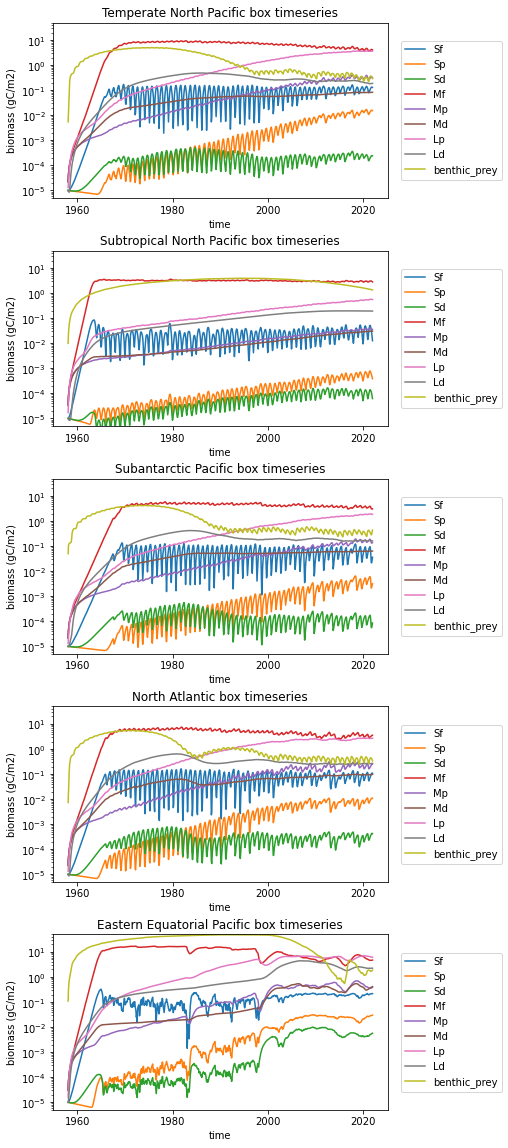

In [38]:
fig = plt.figure(figsize=(6,20))


########################################################################### 
ax = fig.add_subplot(5,1,1)
for group in variables:
    ts_box1[group].plot()
ax.set_ylim([5e-6, 50])
ax.set_yscale("log")
ax.set_ylabel('biomass (gC/m2)')
ax.set_title("Temperate North Pacific box timeseries")
plt.legend(ds.group.data, bbox_to_anchor=(1.025, 0.5), loc=6)


ax = fig.add_subplot(5,1,2)
for group in variables:
    ts_box2[group].plot()
ax.set_ylim([5e-6, 50])
ax.set_yscale("log")
ax.set_ylabel('biomass (gC/m2)')
ax.set_title("Subtropical North Pacific box timeseries")
plt.legend(ds.group.data, bbox_to_anchor=(1.025, 0.5), loc=6)

ax = fig.add_subplot(5,1,3)
for group in variables:
    ts_box3[group].plot()
ax.set_ylim([5e-6, 50])
ax.set_yscale("log")
ax.set_ylabel('biomass (gC/m2)')
ax.set_title("Subantarctic Pacific box timeseries")
plt.legend(ds.group.data, bbox_to_anchor=(1.025, 0.5), loc=6)


ax = fig.add_subplot(5,1,4)
for group in variables:
    ts_box4[group].plot()
ax.set_ylim([5e-6, 50])
ax.set_yscale("log")
ax.set_ylabel('biomass (gC/m2)')
ax.set_title("North Atlantic box timeseries")
plt.legend(ds.group.data, bbox_to_anchor=(1.025, 0.5), loc=6)


ax = fig.add_subplot(5,1,5)
for group in variables:
    ts_box5[group].plot()
ax.set_ylim([5e-6, 50])
ax.set_yscale("log")
ax.set_ylabel('biomass (gC/m2)')
ax.set_title("Eastern Equatorial Pacific box timeseries")
plt.legend(ds.group.data, bbox_to_anchor=(1.025, 0.5), loc=6)


fig.subplots_adjust(hspace=0.3)